In [ ]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

In [ ]:
data = arff.loadarff('PC2.arff')
df = pd.DataFrame(data[0])
df.head()

,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,DESIGN_COMPLEXITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,3.0,2.0,2.0,5.0,4.0,2.0,0.67,2.0,2.0,2.0,...,6.0,0.20,2.0,7.0,2.0,6.0,10.0,87.50,3.0,b'N'
1,3.0,1.0,0.0,0.0,4.0,2.0,1.00,2.0,2.0,2.0,...,5.0,2.00,2.0,8.0,2.0,8.0,1.0,0.00,0.0,b'N'
2,7.0,5.0,10.0,1.0,12.0,4.0,0.31,6.0,2.0,4.0,...,23.0,0.25,26.0,49.0,9.0,17.0,16.0,78.57,13.0,b'N'
3,7.0,4.0,9.0,1.0,12.0,4.0,0.33,6.0,2.0,4.0,...,18.0,0.24,26.0,37.0,13.0,17.0,17.0,76.92,12.0,b'N'
4,7.0,2.0,21.0,1.0,12.0,4.0,0.16,6.0,2.0,2.0,...,13.0,0.14,40.0,46.0,14.0,15.0,29.0,84.62,25.0,b'N'


In [ ]:
# Untuk melihat deskripsi singkat data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BRANCH_COUNT                     745 non-null    float64
 1   CALL_PAIRS                       745 non-null    float64
 2   LOC_CODE_AND_COMMENT             745 non-null    float64
 3   LOC_COMMENTS                     745 non-null    float64
 4   CONDITION_COUNT                  745 non-null    float64
 5   CYCLOMATIC_COMPLEXITY            745 non-null    float64
 6   CYCLOMATIC_DENSITY               745 non-null    float64
 7   DECISION_COUNT                   745 non-null    float64
 8   DECISION_DENSITY                 745 non-null    float64
 9   DESIGN_COMPLEXITY                745 non-null    float64
 10  DESIGN_DENSITY                   745 non-null    float64
 11  EDGE_COUNT                       745 non-null    float64
 12  ESSENTIAL_COMPLEXITY  

In [ ]:
df.describe()

,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,DESIGN_COMPLEXITY,...,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL
count,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,...,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,7.573154,3.656376,14.181208,5.569128,11.997315,4.363758,0.406617,5.610738,2.153987,3.132886,...,6.005369,16.518121,0.268027,31.748993,46.044295,12.451007,11.774497,24.998658,79.618779,16.746309
std,13.519215,5.504645,29.599307,13.546152,25.249188,6.937550,0.259932,12.240155,0.410276,5.647086,...,12.625072,27.876793,0.228221,57.898782,84.540643,17.752573,4.954106,43.298213,15.115911,33.827024
min,1.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.030000,2.000000,2.000000,1.000000,...,2.000000,2.000000,0.020000,1.000000,4.000000,1.000000,4.000000,1.000000,0.000000,0.000000
25%,3.000000,1.000000,4.000000,0.000000,4.000000,2.000000,0.230000,2.000000,2.000000,1.000000,...,2.000000,7.000000,0.150000,9.000000,13.000000,5.000000,8.000000,8.000000,75.000000,5.000000
50%,5.000000,2.000000,8.000000,0.000000,8.000000,3.000000,0.330000,4.000000,2.000000,2.000000,...,4.000000,10.000000,0.220000,16.000000,24.000000,8.000000,11.000000,14.000000,83.330000,10.000000
75%,7.000000,4.000000,14.000000,4.000000,12.000000,5.000000,0.500000,6.000000,2.000000,3.000000,...,6.000000,18.000000,0.330000,31.000000,44.000000,14.000000,14.000000,25.000000,88.890000,17.000000
max,287.000000,74.000000,558.000000,111.000000,570.000000,144.000000,2.000000,284.000000,7.000000,115.000000,...,285.000000,568.000000,3.000000,843.000000,1198.000000,245.000000,46.000000,776.000000,98.250000,663.000000


In [ ]:
df.isna().sum().sort_values(ascending = False)

BRANCH_COUNT                       0
HALSTEAD_ERROR_EST                 0
HALSTEAD_LEVEL                     0
HALSTEAD_PROG_TIME                 0
HALSTEAD_VOLUME                    0
MAINTENANCE_SEVERITY               0
MODIFIED_CONDITION_COUNT           0
MULTIPLE_CONDITION_COUNT           0
NODE_COUNT                         0
NORMALIZED_CYLOMATIC_COMPLEXITY    0
NUM_OPERANDS                       0
NUM_OPERATORS                      0
NUM_UNIQUE_OPERANDS                0
NUM_UNIQUE_OPERATORS               0
NUMBER_OF_LINES                    0
PERCENT_COMMENTS                   0
LOC_TOTAL                          0
HALSTEAD_LENGTH                    0
HALSTEAD_EFFORT                    0
CALL_PAIRS                         0
HALSTEAD_DIFFICULTY                0
LOC_CODE_AND_COMMENT               0
LOC_COMMENTS                       0
CONDITION_COUNT                    0
CYCLOMATIC_COMPLEXITY              0
CYCLOMATIC_DENSITY                 0
DECISION_COUNT                     0
D

DATA PREPROCESSING

### TRANSFORMASI DATASET

In [ ]:
ind_col = [col for col in df.columns if col != 'Defective']
dep_col = 'Defective'

In [ ]:
df[dep_col].value_counts()

Defective
b'N'    729
b'Y'     16
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
# label encoding > special handling for class
label_encoder = LabelEncoder() # Create an instance of LabelEncoder

# Fit and transform the 'label' column
df['Defective'] = label_encoder.fit_transform(df['Defective'])

# show
df.head()

,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,DESIGN_COMPLEXITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,3.0,2.0,2.0,5.0,4.0,2.0,0.67,2.0,2.0,2.0,...,6.0,0.20,2.0,7.0,2.0,6.0,10.0,87.50,3.0,0
1,3.0,1.0,0.0,0.0,4.0,2.0,1.00,2.0,2.0,2.0,...,5.0,2.00,2.0,8.0,2.0,8.0,1.0,0.00,0.0,0
2,7.0,5.0,10.0,1.0,12.0,4.0,0.31,6.0,2.0,4.0,...,23.0,0.25,26.0,49.0,9.0,17.0,16.0,78.57,13.0,0
3,7.0,4.0,9.0,1.0,12.0,4.0,0.33,6.0,2.0,4.0,...,18.0,0.24,26.0,37.0,13.0,17.0,17.0,76.92,12.0,0
4,7.0,2.0,21.0,1.0,12.0,4.0,0.16,6.0,2.0,2.0,...,13.0,0.14,40.0,46.0,14.0,15.0,29.0,84.62,25.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BRANCH_COUNT                     745 non-null    float64
 1   CALL_PAIRS                       745 non-null    float64
 2   LOC_CODE_AND_COMMENT             745 non-null    float64
 3   LOC_COMMENTS                     745 non-null    float64
 4   CONDITION_COUNT                  745 non-null    float64
 5   CYCLOMATIC_COMPLEXITY            745 non-null    float64
 6   CYCLOMATIC_DENSITY               745 non-null    float64
 7   DECISION_COUNT                   745 non-null    float64
 8   DECISION_DENSITY                 745 non-null    float64
 9   DESIGN_COMPLEXITY                745 non-null    float64
 10  DESIGN_DENSITY                   745 non-null    float64
 11  EDGE_COUNT                       745 non-null    float64
 12  ESSENTIAL_COMPLEXITY  

In [ ]:
# Pre-processing dataset yang digunakan
# Normalisasi min max -> pembagian data dengan yang data terbesar
scaler = MinMaxScaler()
# axis = 1 -> mempresentasifkan label di kolom
# axis = 0 -> mempresentasifkan label di row
# Untuk menormalisasikan data menggunakan min max
scaled_data = scaler.fit_transform(df.drop('Defective', axis = 1))
# Untuk menambahka kolom pada data
preprocessed_data = pd.DataFrame(scaled_data, columns = df.columns[:-1])
# Untuk menambahkan kolom defect
print(df)

     BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0             3.0         2.0                   2.0           5.0   
1             3.0         1.0                   0.0           0.0   
2             7.0         5.0                  10.0           1.0   
3             7.0         4.0                   9.0           1.0   
4             7.0         2.0                  21.0           1.0   
..            ...         ...                   ...           ...   
740           3.0         2.0                   1.0           0.0   
741          17.0        13.0                  28.0           0.0   
742           5.0         2.0                  11.0           0.0   
743          39.0        18.0                 129.0          73.0   
744           3.0         2.0                   2.0           0.0   

     CONDITION_COUNT  CYCLOMATIC_COMPLEXITY  CYCLOMATIC_DENSITY  \
0                4.0                    2.0                0.67   
1                4.0                 

In [ ]:
# Standar machine learning / penamaan variable
# X -> 20 fitur yang telah di normalisasi
X = preprocessed_data
# Y -> label yang akan diprediksi atau kolom defects
Y = df['Defective']
print(X)
# X.info()

     BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0        0.006993    0.027027              0.003584      0.045045   
1        0.006993    0.013514              0.000000      0.000000   
2        0.020979    0.067568              0.017921      0.009009   
3        0.020979    0.054054              0.016129      0.009009   
4        0.020979    0.027027              0.037634      0.009009   
..            ...         ...                   ...           ...   
740      0.006993    0.027027              0.001792      0.000000   
741      0.055944    0.175676              0.050179      0.000000   
742      0.013986    0.027027              0.019713      0.000000   
743      0.132867    0.243243              0.231183      0.657658   
744      0.006993    0.027027              0.003584      0.000000   

     CONDITION_COUNT  CYCLOMATIC_COMPLEXITY  CYCLOMATIC_DENSITY  \
0           0.000000               0.006993            0.324873   
1           0.000000               0.

### SMOTE

<Axes: xlabel='Defective', ylabel='count'>

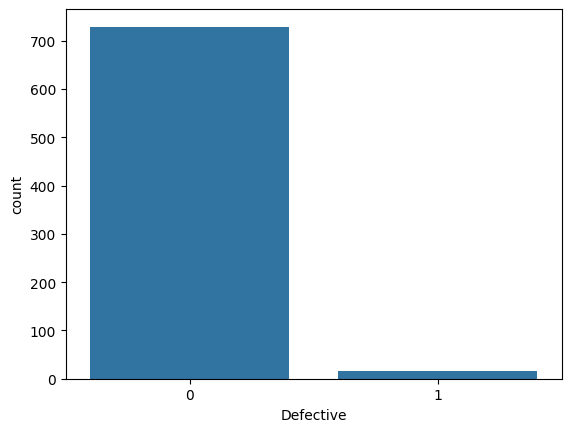

In [ ]:
# Get the value counts
sns.countplot(df, x="Defective")

In [ ]:
# Penyeimbangan class dengan menggunakan SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X, Y = smote.fit_resample(X, Y)

Defective
0            729
1            729
Name: count, dtype: int64



Text(0.5, 1.0, 'Train Class')

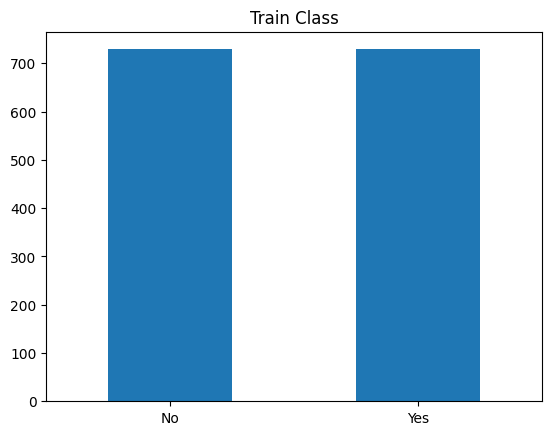

In [ ]:
# imbalanced class
df_Y = pd.DataFrame(Y)
print(f'{df_Y.value_counts()}\n')

df_Y.value_counts().plot(kind='bar')
plt.xticks([0, 1],['No','Yes'], rotation=0)
plt.xlabel('')
plt.title('Train Class')

In [ ]:
# Penyeimbangan class dengan menggunakan SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_resampled, Y_resampled = smote.fit_resample(X, Y)
print(X_resampled)

      BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0         0.006993    0.027027              0.003584      0.045045   
1         0.006993    0.013514              0.000000      0.000000   
2         0.020979    0.067568              0.017921      0.009009   
3         0.020979    0.054054              0.016129      0.009009   
4         0.020979    0.027027              0.037634      0.009009   
...            ...         ...                   ...           ...   
1453      0.017296    0.066126              0.032915      0.063544   
1454      0.011714    0.044931              0.026700      0.086477   
1455      0.020680    0.093729              0.037290      0.054439   
1456      0.025826    0.041923              0.045637      0.112508   
1457      0.011079    0.065899              0.026218      0.066808   

      CONDITION_COUNT  CYCLOMATIC_COMPLEXITY  CYCLOMATIC_DENSITY  \
0            0.000000               0.006993            0.324873   
1            0.000000  

### SPLITTING DATA

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

print("\n shape of train split: ")
print(X_train.shape, Y_train.shape)
print("\n shape of test split: ")
print(X_test.shape, Y_test.shape)


 shape of train split: 
(1166, 36) (1166,)

 shape of test split: 
(292, 36) (292,)


### FEATURE SELECTION

In [ ]:
num_ants = 10
evaporation_rate = 0.5
alpha = 1.0
beta = 2.0
num_iterations = 5
best_features = None
num_best_features = 10
best_accuracy = 0.0

In [ ]:
num_features = X_train.shape[1]
pheromone_levels = np.ones(num_features)

In [ ]:
def feature_slection(alpha, pheromone_levels):
  features_selected = []
  remaining_features = set(range(len(pheromone_levels)))

  while remaining_features:
      probabilities = pheromone_levels[list(remaining_features)] **alpha
      probabilities /= probabilities.sum()

      selected_feature = np.random.choice(list(remaining_features), p=probabilities)
      features_selected.append(selected_feature)
      remaining_features.remove(selected_feature)

  return features_selected

In [ ]:
column_names = df.columns.tolist()

# Remove the last element (class)
column_names = column_names[:-1]
column_names

['BRANCH_COUNT',
 'CALL_PAIRS',
 'LOC_CODE_AND_COMMENT',
 'LOC_COMMENTS',
 'CONDITION_COUNT',
 'CYCLOMATIC_COMPLEXITY',
 'CYCLOMATIC_DENSITY',
 'DECISION_COUNT',
 'DECISION_DENSITY',
 'DESIGN_COMPLEXITY',
 'DESIGN_DENSITY',
 'EDGE_COUNT',
 'ESSENTIAL_COMPLEXITY',
 'ESSENTIAL_DENSITY',
 'LOC_EXECUTABLE',
 'PARAMETER_COUNT',
 'HALSTEAD_CONTENT',
 'HALSTEAD_DIFFICULTY',
 'HALSTEAD_EFFORT',
 'HALSTEAD_ERROR_EST',
 'HALSTEAD_LENGTH',
 'HALSTEAD_LEVEL',
 'HALSTEAD_PROG_TIME',
 'HALSTEAD_VOLUME',
 'MAINTENANCE_SEVERITY',
 'MODIFIED_CONDITION_COUNT',
 'MULTIPLE_CONDITION_COUNT',
 'NODE_COUNT',
 'NORMALIZED_CYLOMATIC_COMPLEXITY',
 'NUM_OPERANDS',
 'NUM_OPERATORS',
 'NUM_UNIQUE_OPERANDS',
 'NUM_UNIQUE_OPERATORS',
 'NUMBER_OF_LINES',
 'PERCENT_COMMENTS',
 'LOC_TOTAL']

In [ ]:
#simulate ant movement
num_features = X_train.shape[1]
pheromone_levels = np.ones(num_features)

for iteration in range(num_iterations):
    ant_paths = []
    print(f'Iteration number {iteration}')
    for ant in range(num_ants):
        features_selected = feature_slection(alpha,pheromone_levels)

        ant_paths.append(features_selected)

        features_names=[(column_names)[i] for i in features_selected]


        # Evaluate solution
        clf = RandomForestClassifier(random_state=42)
        clf.fit(X_train.iloc[:,features_selected], Y_train.values.ravel())
        y_pred = clf.predict(X_test.iloc[:,features_selected])
        accuracy = accuracy_score(Y_test, y_pred)
        print(f'\t\tPaths:{ant_paths} \t Selected features to be tested: {features_names} \t accuracy: {accuracy} \n\t\t---------------------------------------')

        # Update pheromone levels
        pheromone_levels *= (1 - evaporation_rate)
        pheromone_levels[features_selected] += accuracy

        # Update global best solution
        if accuracy > best_accuracy:
            best_features = features_selected
            best_accuracy = accuracy
            print(f'\t\t!!!!!!best features:{best_features} \t accuracy: {best_accuracy} \n---------------------------------------')

Iteration number 0
		Paths:[[3, 18, 10, 32, 33, 20, 13, 35, 17, 31, 15, 22, 26, 24, 21, 0, 29, 2, 25, 4, 9, 12, 28, 14, 6, 34, 7, 1, 16, 19, 8, 27, 23, 11, 5, 30]] 	 Selected features to be tested: ['LOC_COMMENTS', 'HALSTEAD_EFFORT', 'DESIGN_DENSITY', 'NUM_UNIQUE_OPERATORS', 'NUMBER_OF_LINES', 'HALSTEAD_LENGTH', 'ESSENTIAL_DENSITY', 'LOC_TOTAL', 'HALSTEAD_DIFFICULTY', 'NUM_UNIQUE_OPERANDS', 'PARAMETER_COUNT', 'HALSTEAD_PROG_TIME', 'MULTIPLE_CONDITION_COUNT', 'MAINTENANCE_SEVERITY', 'HALSTEAD_LEVEL', 'BRANCH_COUNT', 'NUM_OPERANDS', 'LOC_CODE_AND_COMMENT', 'MODIFIED_CONDITION_COUNT', 'CONDITION_COUNT', 'DESIGN_COMPLEXITY', 'ESSENTIAL_COMPLEXITY', 'NORMALIZED_CYLOMATIC_COMPLEXITY', 'LOC_EXECUTABLE', 'CYCLOMATIC_DENSITY', 'PERCENT_COMMENTS', 'DECISION_COUNT', 'CALL_PAIRS', 'HALSTEAD_CONTENT', 'HALSTEAD_ERROR_EST', 'DECISION_DENSITY', 'NODE_COUNT', 'HALSTEAD_VOLUME', 'EDGE_COUNT', 'CYCLOMATIC_COMPLEXITY', 'NUM_OPERATORS'] 	 accuracy: 0.9863013698630136 
		-----------------------------------

In [ ]:
best_features_names=[(column_names)[i] for i in best_features[:num_best_features]]
print("Best Feature Subset:", best_features_names)
print("Best Accuracy:", best_accuracy)

Best Feature Subset: ['HALSTEAD_DIFFICULTY', 'DESIGN_COMPLEXITY', 'LOC_COMMENTS', 'HALSTEAD_PROG_TIME', 'NUM_UNIQUE_OPERANDS', 'HALSTEAD_ERROR_EST', 'HALSTEAD_VOLUME', 'HALSTEAD_LEVEL', 'PERCENT_COMMENTS', 'MAINTENANCE_SEVERITY']
Best Accuracy: 0.9897260273972602


In [ ]:
best_features_names

['HALSTEAD_DIFFICULTY',
 'DESIGN_COMPLEXITY',
 'LOC_COMMENTS',
 'HALSTEAD_PROG_TIME',
 'NUM_UNIQUE_OPERANDS',
 'HALSTEAD_ERROR_EST',
 'HALSTEAD_VOLUME',
 'HALSTEAD_LEVEL',
 'PERCENT_COMMENTS',
 'MAINTENANCE_SEVERITY']

In [ ]:
df

,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,DESIGN_COMPLEXITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,3.0,2.0,2.0,5.0,4.0,2.0,0.67,2.0,2.00,2.0,...,6.0,0.20,2.0,7.0,2.0,6.0,10.0,87.50,3.0,0
1,3.0,1.0,0.0,0.0,4.0,2.0,1.00,2.0,2.00,2.0,...,5.0,2.00,2.0,8.0,2.0,8.0,1.0,0.00,0.0,0
2,7.0,5.0,10.0,1.0,12.0,4.0,0.31,6.0,2.00,4.0,...,23.0,0.25,26.0,49.0,9.0,17.0,16.0,78.57,13.0,0
3,7.0,4.0,9.0,1.0,12.0,4.0,0.33,6.0,2.00,4.0,...,18.0,0.24,26.0,37.0,13.0,17.0,17.0,76.92,12.0,0
4,7.0,2.0,21.0,1.0,12.0,4.0,0.16,6.0,2.00,2.0,...,13.0,0.14,40.0,46.0,14.0,15.0,29.0,84.62,25.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,3.0,2.0,1.0,0.0,4.0,2.0,1.00,2.0,2.00,1.0,...,8.0,0.33,6.0,8.0,6.0,7.0,6.0,50.00,2.0,0
741,17.0,13.0,28.0,0.0,22.0,10.0,0.32,10.0,2.20,5.0,...,42.0,0.29,43.0,64.0,20.0,19.0,34.0,90.32,31.0,0
742,5.0,2.0,11.0,0.0,8.0,3.0,0.21,4.0,2.00,3.0,...,9.0,0.19,16.0,33.0,10.0,13.0,16.0,78.57,14.0,0
743,39.0,18.0,129.0,73.0,74.0,20.0,0.14,36.0,2.06,16.0,...,102.0,0.09,286.0,369.0,69.0,22.0,223.0,92.24,146.0,0


### MODEL BUILDING

DECISION TREE

In [ ]:
# Pemanggilan model Decision Tree
clfDct = tree.DecisionTreeClassifier()
# Melatih data
clfDct.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
dt=DecisionTreeClassifier(max_depth=10,criterion="gini")
dt.fit(X_train,Y_train)
predictions = dt.predict(X_test)
accdt=accuracy_score(Y_test, predictions)*100
print("Accuracy of Decision Tree (%): \n",accdt)
#get FPR
recalldt=recall_score(Y_test,predictions)*100
print("Recall of Decision Tree is: \n",recalldt)
precdt=precision_score(Y_test,predictions)*100
print("Precision of Decision Tree is: \n",precdt)

Accuracy of Decision Tree (%): 
 95.2054794520548
Recall of Decision Tree is: 
 96.64429530201343
Precision of Decision Tree is: 
 94.11764705882352


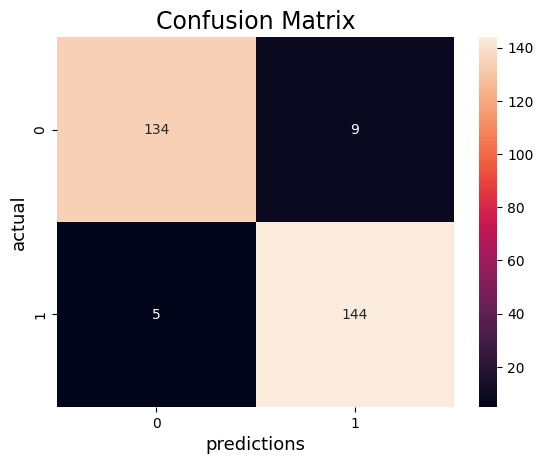

In [ ]:
predictions = dt.predict(X_test)
confusion = confusion_matrix(Y_test, predictions)
sns.heatmap(confusion, annot=True, fmt='g')
plt.ylabel('actual',fontsize=13)
plt.xlabel('predictions',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       143
           1       0.94      0.97      0.95       149

    accuracy                           0.95       292
   macro avg       0.95      0.95      0.95       292
weighted avg       0.95      0.95      0.95       292



SVM

In [ ]:
from sklearn.model_selection import cross_val_score
svm=clf = SVC(gamma="auto",kernel='linear',degree=3, C=1, random_state=99)
svm.fit(X_train,Y_train)
predictions = svm.predict(X_test)
accsvm=accuracy_score(Y_test, predictions)*100
print("Accuracy of Support Vector Machine (%): \n",accsvm)
#get FPR
recallsvm=recall_score(Y_test,predictions)*100
print("Recall of Support Vector Machine is: \n",recallsvm)
precsvm=precision_score(Y_test,predictions)*100
print("Precision of Support Vector Machine is: \n",precsvm)

Accuracy of Support Vector Machine (%): 
 85.95890410958904
Recall of Support Vector Machine is: 
 100.0
Precision of Support Vector Machine is: 
 78.42105263157895


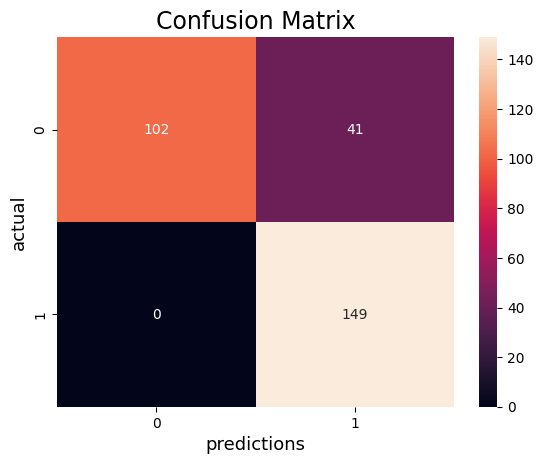

In [ ]:
predictions = svm.predict(X_test)
confusion = confusion_matrix(Y_test, predictions)
sns.heatmap(confusion, annot=True, fmt='g')
plt.ylabel('actual',fontsize=13)
plt.xlabel('predictions',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83       143
           1       0.78      1.00      0.88       149

    accuracy                           0.86       292
   macro avg       0.89      0.86      0.86       292
weighted avg       0.89      0.86      0.86       292



RANDOM FOREST

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
predictions = rf.predict(X_test)
accrf=accuracy_score(Y_test, predictions)*100
print("Accuracy of Random Forest (%): \n",accrf)
#get FPR
recallrf=recall_score(Y_test,predictions)*100
print("Recall of Random Forest is: \n",recallrf)
precrf=precision_score(Y_test,predictions)*100
print("Precision of Random Forest is: \n",precrf)

Accuracy of Random Forest (%): 
 98.63013698630137
Recall of Random Forest is: 
 99.32885906040269
Precision of Random Forest is: 
 98.01324503311258


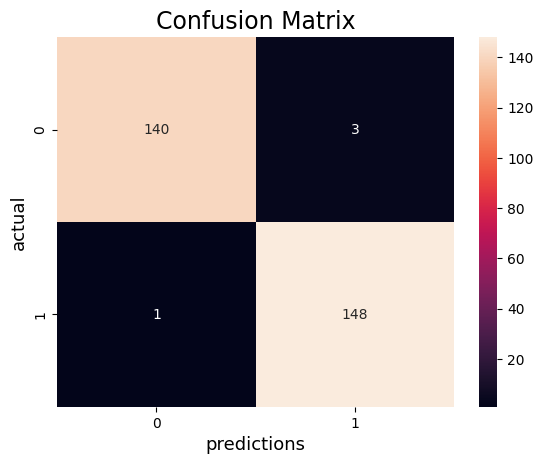

In [ ]:
predictions = rf.predict(X_test)
confusion = confusion_matrix(Y_test, predictions)
sns.heatmap(confusion, annot=True, fmt='g')
plt.ylabel('actual',fontsize=13)
plt.xlabel('predictions',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       143
           1       0.98      0.99      0.99       149

    accuracy                           0.99       292
   macro avg       0.99      0.99      0.99       292
weighted avg       0.99      0.99      0.99       292



NAIVE BAYES

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, Y_train)
predictions = naive_bayes.predict(X_test)
accnaive_bayes=accuracy_score(Y_test, predictions)*100
print("Accuracy of Naive Bayes (%): \n",accnaive_bayes)
#get FPR
recallnaive_bayes=recall_score(Y_test,predictions)*100
print("Recall of Naive Bayes is: \n",recallnaive_bayes)
precnaive_bayes=precision_score(Y_test,predictions)*100
print("Precision of Naive Bayes is: \n",precnaive_bayes)

Accuracy of Naive Bayes (%): 
 81.16438356164383
Recall of Naive Bayes is: 
 77.85234899328859
Precision of Naive Bayes is: 
 84.05797101449275


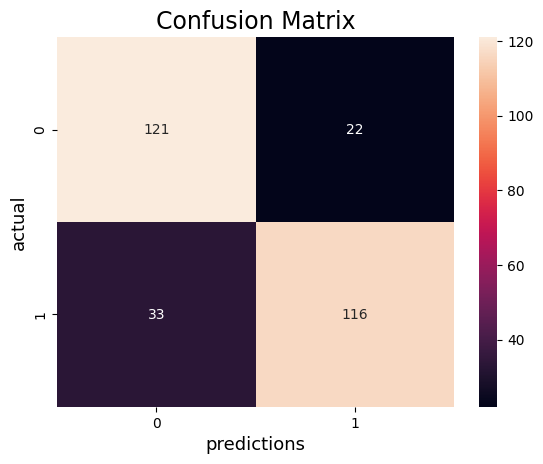

In [ ]:
predictions = naive_bayes.predict(X_test)
confusion = confusion_matrix(Y_test, predictions)
sns.heatmap(confusion, annot=True, fmt='g')
plt.ylabel('actual',fontsize=13)
plt.xlabel('predictions',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.85      0.81       143
           1       0.84      0.78      0.81       149

    accuracy                           0.81       292
   macro avg       0.81      0.81      0.81       292
weighted avg       0.81      0.81      0.81       292



### GRADIENT BOOSTING

In [ ]:
df

,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,DESIGN_COMPLEXITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,3.0,2.0,2.0,5.0,4.0,2.0,0.67,2.0,2.00,2.0,...,6.0,0.20,2.0,7.0,2.0,6.0,10.0,87.50,3.0,0
1,3.0,1.0,0.0,0.0,4.0,2.0,1.00,2.0,2.00,2.0,...,5.0,2.00,2.0,8.0,2.0,8.0,1.0,0.00,0.0,0
2,7.0,5.0,10.0,1.0,12.0,4.0,0.31,6.0,2.00,4.0,...,23.0,0.25,26.0,49.0,9.0,17.0,16.0,78.57,13.0,0
3,7.0,4.0,9.0,1.0,12.0,4.0,0.33,6.0,2.00,4.0,...,18.0,0.24,26.0,37.0,13.0,17.0,17.0,76.92,12.0,0
4,7.0,2.0,21.0,1.0,12.0,4.0,0.16,6.0,2.00,2.0,...,13.0,0.14,40.0,46.0,14.0,15.0,29.0,84.62,25.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,3.0,2.0,1.0,0.0,4.0,2.0,1.00,2.0,2.00,1.0,...,8.0,0.33,6.0,8.0,6.0,7.0,6.0,50.00,2.0,0
741,17.0,13.0,28.0,0.0,22.0,10.0,0.32,10.0,2.20,5.0,...,42.0,0.29,43.0,64.0,20.0,19.0,34.0,90.32,31.0,0
742,5.0,2.0,11.0,0.0,8.0,3.0,0.21,4.0,2.00,3.0,...,9.0,0.19,16.0,33.0,10.0,13.0,16.0,78.57,14.0,0
743,39.0,18.0,129.0,73.0,74.0,20.0,0.14,36.0,2.06,16.0,...,102.0,0.09,286.0,369.0,69.0,22.0,223.0,92.24,146.0,0


In [ ]:
data = arff.loadarff('PC2.arff')
# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Inisialisasi model-model yang akan digabungkan
svm_model = SVC(probability=True)
rf_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()
nb_model = GaussianNB()

# Inisialisasi model ensemble dengan Gradient Boosting
ensemble_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Melatih model-model dasar
svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

# Membuat prediksi dari model-model dasar
svm_pred = svm_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
nb_pred = nb_model.predict(X_test)

# Menggabungkan prediksi dari model-model dasar sebagai fitur untuk model ensemble
X_ensemble = np.column_stack((svm_pred, rf_pred, dt_pred, nb_pred))

# Melatih model ensemble
ensemble_model.fit(X_ensemble, y_test)

# Membuat prediksi menggunakan model ensemble
ensemble_pred = ensemble_model.predict(X_ensemble)


# Menampilkan laporan klasifikasi untuk model SVM
print("Classification Report of SVM Model:")
print(classification_report(y_test, svm_pred))

# Menampilkan laporan klasifikasi untuk model Random Forest
print("Classification Report of Random Forest Model:")
print(classification_report(y_test, rf_pred))

# Menampilkan laporan klasifikasi untuk model Decision Tree
print("Classification Report of Decision Tree Model:")
print(classification_report(y_test, dt_pred))

# Menampilkan laporan klasifikasi untuk model Naive Bayes
print("Classification Report of Naive Bayes Model:")
print(classification_report(y_test, nb_pred))

# Menghitung akurasi dari model ensemble
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)

# Mencetak akurasi model ensemble
print("Accuracy of Ensemble Model:", ensemble_accuracy)

Classification Report of SVM Model:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90       147
           1       0.84      1.00      0.91       145

    accuracy                           0.91       292
   macro avg       0.92      0.91      0.91       292
weighted avg       0.92      0.91      0.91       292

Classification Report of Random Forest Model:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       147
           1       0.98      0.99      0.98       145

    accuracy                           0.98       292
   macro avg       0.98      0.98      0.98       292
weighted avg       0.98      0.98      0.98       292

Classification Report of Decision Tree Model:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       147
           1       0.97      0.97      0.97       145

    accuracy                           0.97       292


HASIL SELURUH ALGORITMA MURNI

In [ ]:
algos=["Decision Tree", "Support Vector Machine","Random Forrest","Naive Bayes"]
acc=[accdt,accsvm,accrf,accnaive_bayes]
recall=[recalldt,recallsvm,recallrf,recallnaive_bayes]
prec=[precdt,precsvm,precrf,precnaive_bayes]
comp={"Algorithms":algos,"Accuracies":acc,"Recall":recall,"Precision":prec}
compdf=pd.DataFrame(comp)
display(compdf.sort_values(by=["Accuracies","Recall","Precision"], ascending=False))

,Algorithms,Accuracies,Recall,Precision
2,Random Forrest,98.630137,99.328859,98.013245
0,Decision Tree,95.205479,96.644295,94.117647
1,Support Vector Machine,85.958904,100.000000,78.421053
3,Naive Bayes,81.164384,77.852349,84.057971
